In [2]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

plt.ion()   # interactive mode

data_dir = "data_preprocessed/"

In [3]:
class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""
    
    def __call__(self, image):
        # swap color axis because
        # numpy image: H x W x C
        # torch image: C X H X W
        
        return torch.from_numpy(image.transpose((2, 0, 1)))

data_transform = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

In [4]:
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transform)
                  for x in ['train', 'test']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'test']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'test']}
class_names = image_datasets['train'].classes

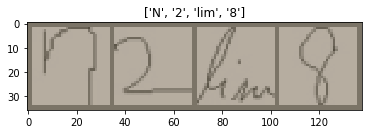

In [5]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders["train"]))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])


In [6]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 82)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [38]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(dataloaders["train"], 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 3.569
[1,  4000] loss: 1.644
[1,  6000] loss: 0.978
[1,  8000] loss: 0.797
[1, 10000] loss: 0.690
[1, 12000] loss: 0.599
[1, 14000] loss: 0.582
[1, 16000] loss: 0.541
[1, 18000] loss: 0.502
[1, 20000] loss: 0.485
[1, 22000] loss: 0.486
[1, 24000] loss: 0.432
[1, 26000] loss: 0.444
[1, 28000] loss: 0.440
[1, 30000] loss: 0.400
[1, 32000] loss: 0.414
[1, 34000] loss: 0.387
[1, 36000] loss: 0.397
[1, 38000] loss: 0.393
[1, 40000] loss: 0.356
[1, 42000] loss: 0.375
[1, 44000] loss: 0.363
[1, 46000] loss: 0.361
[1, 48000] loss: 0.327
[1, 50000] loss: 0.326
[1, 52000] loss: 0.354
[1, 54000] loss: 0.313
[1, 56000] loss: 0.327
[1, 58000] loss: 0.321
[1, 60000] loss: 0.312
[1, 62000] loss: 0.298
[1, 64000] loss: 0.318
[1, 66000] loss: 0.315
[1, 68000] loss: 0.308
[1, 70000] loss: 0.317
[1, 72000] loss: 0.297
[1, 74000] loss: 0.295
[2,  2000] loss: 0.266
[2,  4000] loss: 0.254
[2,  6000] loss: 0.278
[2,  8000] loss: 0.271
[2, 10000] loss: 0.256
[2, 12000] loss: 0.288
[2, 14000] 

KeyboardInterrupt: 

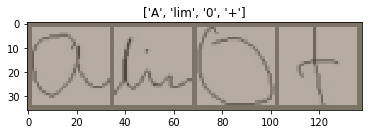

In [7]:
dataiter = iter(dataloaders['test'])
images, classes = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images), title=[class_names[x] for x in classes])

outputs = net(images)

In [8]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % class_names[x] for x in predicted))
#class_names[x] for x in classes

Predicted:    tan   tan   tan   tan
